<a href="https://colab.research.google.com/github/YoshifumiMiyagi/KD_ML/blob/main/KD_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import codecs
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

SEED=42

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with codecs.open("/content/drive/MyDrive/iwashima_project.csv", "r", "Shift-JIS", "ignore") as file:
    raw1 = pd.read_table(file, delimiter=",")
with codecs.open("/content/drive/MyDrive/iwashima_project_2.csv", "r", "Shift-JIS", "ignore") as file:
    raw2 = pd.read_table(file, delimiter=",")

In [3]:
raw2.columns

Index(['ID', 'Age (y)', 'Age (m)', 'Age', 'Length', 'Weight', 'sex',
       '5th Criteria count', 'Onset date', 'Treat day', 'PSL_no_0,1',
       'IVIG-non-responder', 'Response', 'preWBC_1', 'postWBC_1', 'FC_WBC',
       'preNetro', 'post Netro', 'pre_Lym', 'post_Lym', 'preN_Lratio',
       'preCRP_1', 'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt',
       'preTbil', 'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST',
       'preALT', 'postALT', 'FC_ALT', 'preNa', 'postNa', 'FC_Na', 'preIgG',
       'postIgG', 'preBNP', 'postBNP', 'prePCT', 'postPCT', 'admit_day',
       'ent_day', 'MAX_KT', 'MIN_KT', 'D_KT', 'Finish_KT', 'End_time',
       'Treat date', 'Ara', 'AfterIVIG37.5(0.1)', 'startKT', 'Last_rate',
       'Last_KT', 'Achieve_rate', 'Achieve_KT', 'Last_time', 'Achieve_time',
       'Achieve_time_categoly'],
      dtype='object')

In [112]:
raw2_2 = raw2.loc[:,['Age', 'Length', 'Weight', 'sex', '5th Criteria count',
       'Treat day', 'preWBC_1',  'preNetro',  'pre_Lym', 'preCRP_1',
       'prePlt','preTbil','preAST', 'preALT', 'preNa', 'preIgG']]
raw2_2.columns = ['Age', 'Length', 'Weight', 'sex', 'Criteria',
       'Treat day', 'WBC',  'Neutro',  'Lym', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG']
raw2_2['sex'] = raw2_2['sex'].replace('F',0).replace('M',1)
Dx_2 = raw2_2
Dy_2 = raw2.loc[:,"Response"]

In [113]:
imp_mean = IterativeImputer(random_state=SEED)
A= imp_mean.fit_transform(Dx_2)
A= pd.DataFrame(A)
A.index = Dx_2.index
A.columns = Dx_2.columns

X = A, y = Dy_2

In [6]:
from sklearn.preprocessing import StandardScaler
A_ss = StandardScaler().fit_transform(A)

In [7]:
A_ss = pd.DataFrame(A_ss)
A_ss.index = Dx_2.index
A_ss.columns = Dx_2.columns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

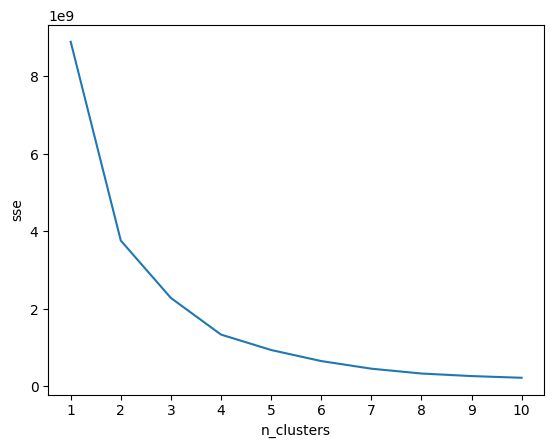

In [8]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(A)
  SSE.append(kmeans.inertia_)


plt.plot(range(1, 11), SSE)

plt.xlabel('n_clusters')
plt.ylabel('sse')
plt.xticks(range(1,11,1))

plt.show()

In [9]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 3).fit(A)
clusters = kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
k=3
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 142
Cluster 1: n = 116
Cluster 2: n = 40


# KMeans

# UMAP

In [11]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 897.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.0 MB/s eta 0:00:00


In [12]:
import umap.umap_ as umap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


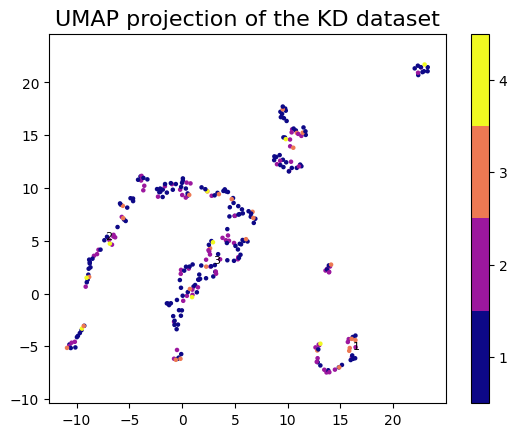

In [99]:
import matplotlib as mpl
reducer = umap.UMAP(random_state=SEED, n_neighbors=4,min_dist=0.5,metric='chebyshev')
reducer.fit(A)
embedding = reducer.transform(A)

cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3']

plt.scatter(embedding[:, 0], embedding[:, 1], c=Dy_2, cmap='plasma',  s=5)
plt.gca().set_aspect('equal', 'datalim')

plt.title('UMAP projection of the KD dataset', fontsize=16)
for i, label in enumerate(cluster_names):
    plt.annotate(label, cluster_centers[i], size=8)

plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))

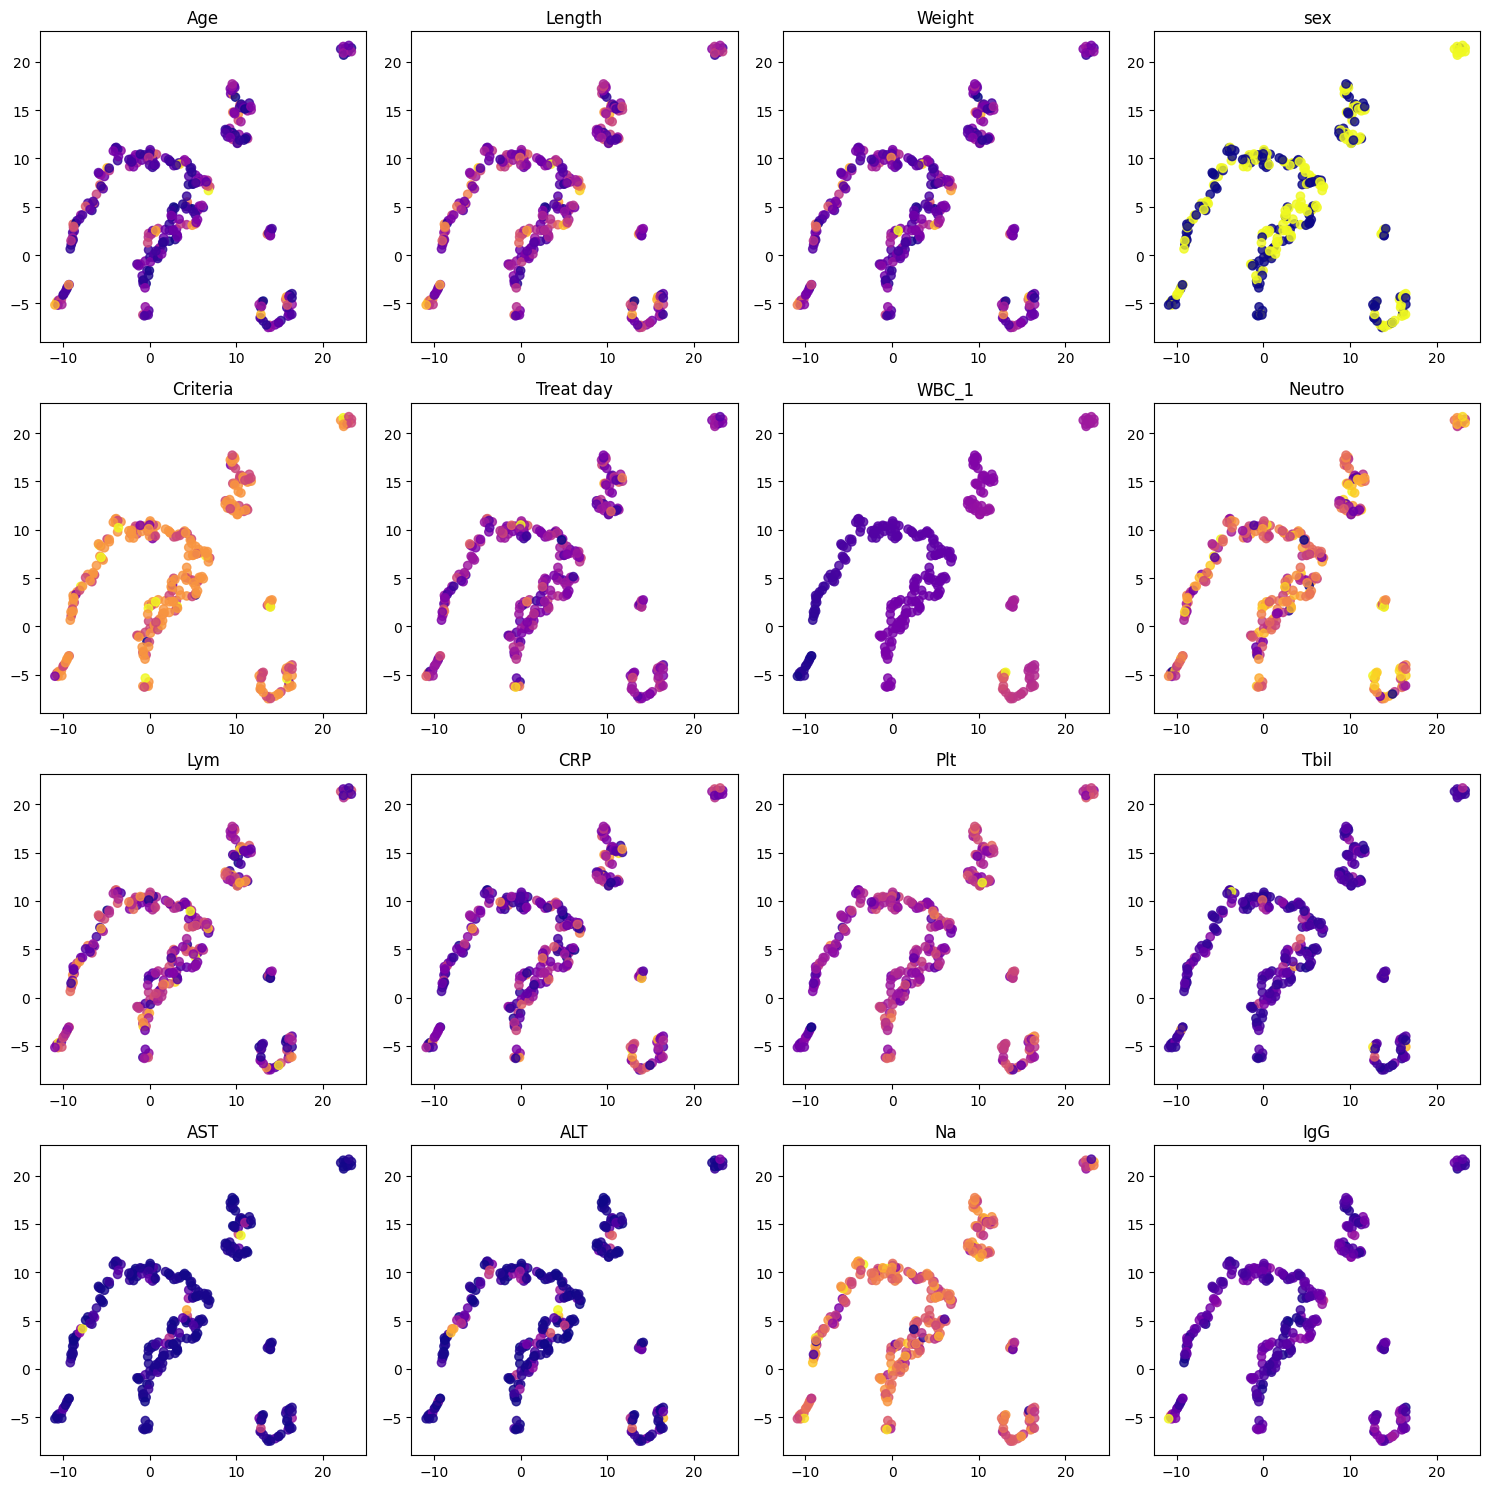

In [100]:
fig = plt.figure(figsize=(15,15))
cols = A.columns
for i, col in enumerate(cols):
    ax = fig.add_subplot(4, 4, i+1, title=col)
    ax.scatter(embedding[:, 0], embedding[:, 1],
        c=A[col], cmap='plasma', alpha=0.8)
fig.tight_layout()
plt.show()

In [111]:
A

,Age,Length,Weight,sex,Criteria,Treat day,WBC_1,Neutro,Lym,CRP,Plt,Tbil,AST,ALT,Na,IgG
0,4.000000,96.0,14.0,0.0,3.0,4.0,23200.0,84.000000,6.0,10.78,27.4,0.8,34.0,21.0,134.0,1197.000000
1,2.666667,96.0,12.1,1.0,3.0,7.0,16000.0,68.700000,21.0,14.99,30.6,0.6,33.0,23.0,135.0,464.000000
2,3.000000,90.0,12.0,0.0,4.0,4.0,37200.0,92.000000,4.8,14.39,30.3,1.1,45.0,47.0,133.0,727.000000
3,2.833333,89.3,15.1,0.0,4.0,7.0,13900.0,67.000000,24.1,11.12,38.3,0.6,35.0,12.0,134.0,769.000000
4,0.333333,61.0,5.3,0.0,4.0,6.0,13200.0,57.000000,39.5,2.89,68.0,0.4,65.0,43.0,138.0,755.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,3.666667,93.0,14.0,0.0,6.0,3.0,15700.0,81.000000,15.0,6.72,27.4,0.8,52.0,41.0,133.0,621.000000
294,2.916667,90.2,11.6,1.0,5.0,7.0,13500.0,87.000000,10.0,17.12,18.1,0.6,43.0,25.0,124.0,481.000000
295,1.833333,84.0,12.5,1.0,5.0,3.0,14000.0,74.000000,19.0,10.28,30.6,0.8,34.0,20.0,130.0,655.731897
296,2.583333,92.3,13.0,1.0,5.0,5.0,14000.0,73.765676,18.3,9.54,26.1,0.9,29.0,11.0,135.0,742.000000


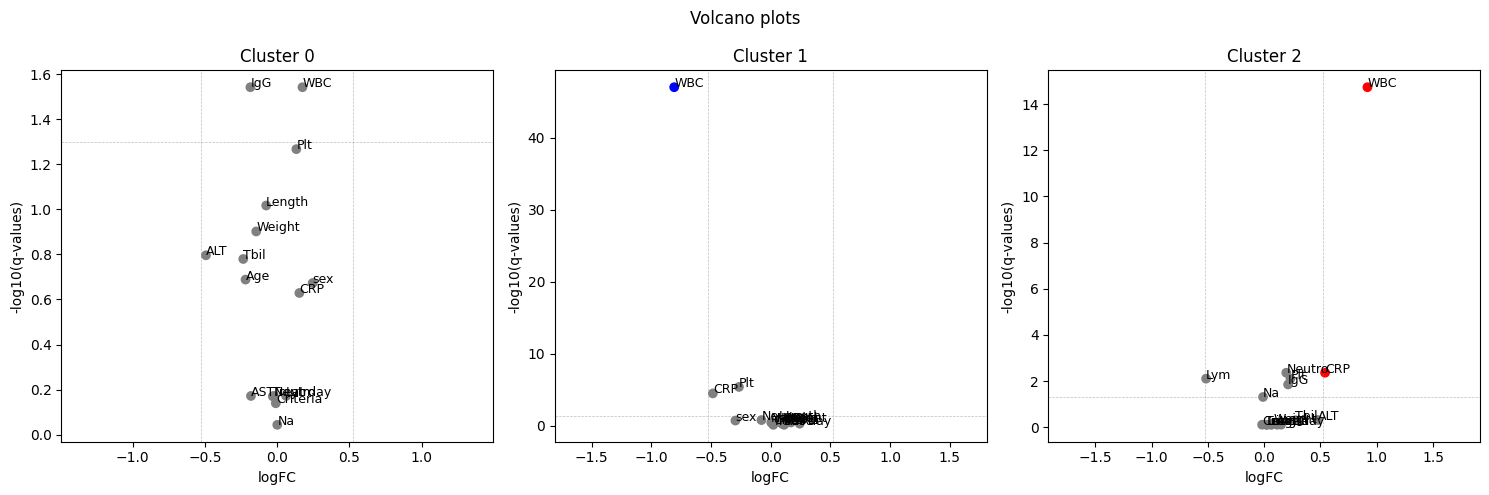

In [114]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = A.copy()
df_features_with_clusters['cluster'] = clusters
cols = A.columns

q_threshold = 0.05
fc_threshold = 1.44

fig = plt.figure(figsize=(15,5))

for i in range(k):
    p_values = []
    fcs = []

    for col in cols:

        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)


        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)


    q_values = multipletests(p_values, method='fdr_bh')[1]


    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):

        if q_value < q_threshold and fc > fc_threshold:
            colors.append('red')

        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('blue')

        else:
            colors.append('gray')

    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)

    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1])
    ax.set_ylim(ax.get_ylim())


    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)


    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()

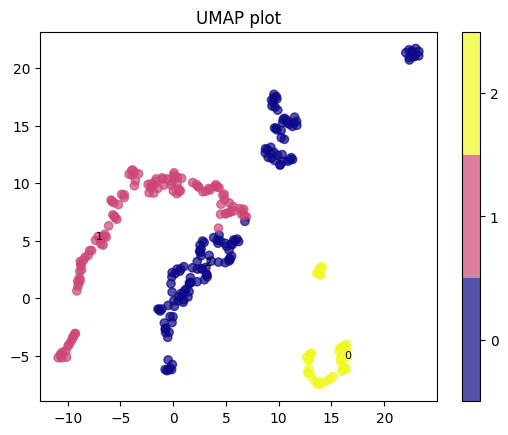

In [115]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['0', '1','2']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')
for i, label in enumerate(cluster_names):
    plt.annotate(label, cluster_centers[i], size=8)
plt.colorbar(boundaries=np.arange(0,4,1)-0.5).set_ticks(np.arange(0,3,1))
plt.show()

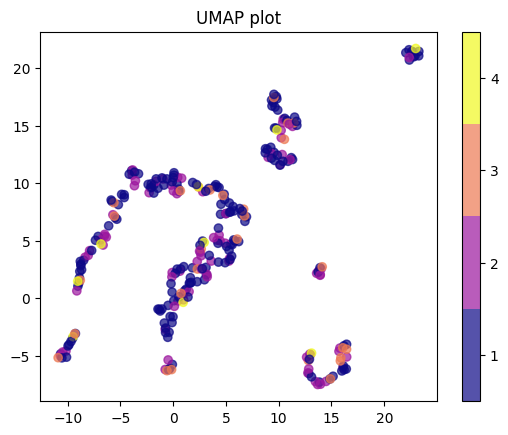

In [116]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3','4']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=Dy_2, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')



plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))
plt.show()

In [117]:
B = df_features_with_clusters.copy()
B['Group'] = Dy_2

In [118]:
B[B['cluster']==0]["Group"].value_counts()

Group
1    89
2    39
3    10
4     4
Name: count, dtype: int64

In [119]:
B[B['cluster']==1]["Group"].value_counts()

Group
1    74
2    27
3    11
4     4
Name: count, dtype: int64

In [120]:
B[B['cluster']==2]["Group"].value_counts()

Group
2    18
1    14
3     7
4     1
Name: count, dtype: int64

In [121]:
import scipy.stats as st
df = pd.DataFrame([[12,88,77],
                   [7,9,12]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)


0.005976402731211144


In [122]:
df = pd.DataFrame([[13,42,29],
                   [1,4,4]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.8273376496082283


In [125]:
B[(B['cluster']==0)&(B['Group']==1)]['WBC'].mean(),B[(B['cluster']==1)&(B['Group']==1)]['WBC'].mean(),B[(B['cluster']==2)&(B['Group']==1)]['WBC'].mean()

(15663.090878791427, 10228.243243243243, 23578.571428571428)

In [126]:
B[(B['cluster']==0)&(B['Group']==2)]['WBC'].mean(),B[(B['cluster']==1)&(B['Group']==2)]['WBC'].mean(),B[(B['cluster']==2)&(B['Group']==2)]['WBC'].mean()

(15261.538461538461, 9696.296296296296, 24694.444444444445)

In [127]:
B[(B['cluster']==0)&(B['Group']==3)]['WBC'].mean(),B[(B['cluster']==1)&(B['Group']==3)]['WBC'].mean(),B[(B['cluster']==2)&(B['Group']==3)]['WBC'].mean()

(15300.0, 9954.545454545454, 23271.428571428572)

In [128]:
B[(B['cluster']==0)&(B['Group']==4)]['WBC'].mean(),B[(B['cluster']==1)&(B['Group']==4)]['WBC'].mean(),B[(B['cluster']==2)&(B['Group']==4)]['WBC'].mean()

(16250.0, 8400.0, 48800.0)

In [131]:
B[(B['cluster']==0)]['WBC'].mean(),B[(B['cluster']==1)]['WBC'].mean(),B[(B['cluster']==2)]['WBC'].mean()

(15543.768226848148, 10015.431034482759, 24657.5)

In [ ]:
B[(B['cluster']==0)&(B['Group']==1)]['CRP'].mean(),B[(B['cluster']==1)&(B['Group']==1)]['CRP'].mean(),B[(B['cluster']==2)&(B['Group']==1)]['CRP'].mean()

In [ ]:
B[(B['cluster']==0)&(B['Group']==2)]['CRP'].mean(),B[(B['cluster']==1)&(B['Group']==2)]['CRP'].mean(),B[(B['cluster']==2)&(B['Group']==2)]['CRP'].mean()

In [ ]:
B[(B['cluster']==0)&(B['Group']==3)]['CRP'].mean(),B[(B['cluster']==1)&(B['Group']==3)]['CRP'].mean(),B[(B['cluster']==2)&(B['Group']==3)]['CRP'].mean()

In [ ]:
B[(B['cluster']==0)&(B['Group']==4)]['CRP'].mean(),B[(B['cluster']==1)&(B['Group']==4)]['CRP'].mean(),B[(B['cluster']==2)&(B['Group']==4)]['CRP'].mean()

In [132]:
B[B['cluster']==0]['CRP'].mean(),B[B['cluster']==1]['CRP'].mean(),B[B['cluster']==2]['CRP'].mean()

(8.247069263870612, 6.280172413793103, 10.7095)